In [91]:
import pandas as pd
import numpy as np

In [115]:

labels = pd.read_fwf("./UCI_HAR_Dataset/features.txt",header=None)
X_train = pd.read_fwf("./UCI_HAR_Dataset/train/X_train.txt",header=None)
X_train.columns = labels


y_train = pd.read_fwf("./UCI_HAR_Dataset/train/y_train.txt",header=None)
y_train = pd.Series(y_train[0])

X_test = pd.read_fwf("./UCI_HAR_Dataset/test/X_test.txt",header=None)
X_test.columns = labels

y_test = pd.read_fwf("./UCI_HAR_Dataset/test/y_test.txt",header=None)
y_test = pd.Series(y_test[0])

data = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])


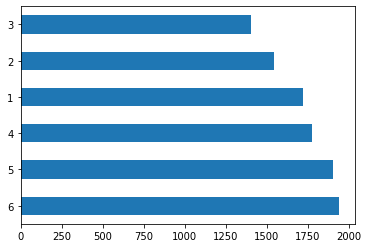

In [116]:
y.value_counts().plot(kind='barh')

In [56]:
data.isna().sum().sum()

0

In [123]:
a = pd.Series([i[0] for i in data.columns]).str.contains('Gyro')
data_gyro = X_train[data.columns[a]]

In [124]:
b = pd.Series([i[0] for i in data.columns]).str.contains('Acc')
data_acc = X_train[data.columns[b]]

In [129]:
data_gyro.columns.intersection(data_acc.columns) #Wiec jest gitara

Index([], dtype='object')

In [135]:
angle = data.columns.difference(data_gyro.columns.union(data_acc.columns))
data_angle = data[angle]